In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
from scipy.stats import linregress

In [ ]:
# Fines de semana que tenemos 8-9/Junio, 15-16/Junio, 22-23/Junio

In [3]:
nombres = ['tiempo' ,'SFlujo'   , 'TemPrtdIn', 'TemPrtdOut','TCPan1'  , 'TCPan2'   , 'TCPan3'      , 'TCPan4'  , 'TCPan5',
           'TCCubo01', 'TCCubo02', 'TCCubo03' , 'TCCubo04'  ,'TCCubo05', 'TCCubo06' , 'TCCubo07'    , 'TCCubo08', 'TCCubo09', 'TCCubo010', 
           'TCPiso'  , 'TCAire'  , 'A1' , 'A2', 'A3', 'A4'  ,'Flujo2'  , 'TemPrtdIn2', 'TemPrtdOut2','InterIn'  , 'InterOut' ]
data = pd.read_csv('../../002_datos/mediciones.csv',names=nombres,index_col=0,parse_dates=True)
data['dia'] = data.index.day_of_week

<AxesSubplot:xlabel='tiempo'>

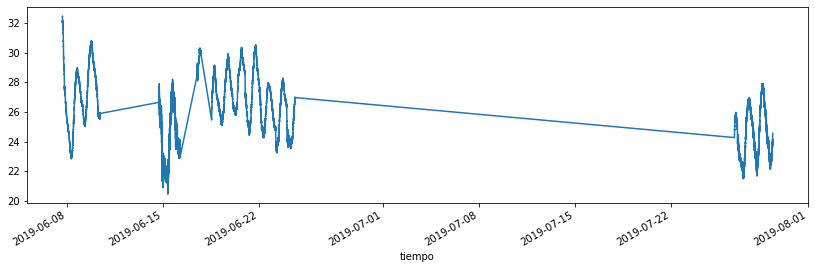

In [4]:
data['TCAire'].plot(figsize=(14,4))

In [36]:
def eplus_fileimport(archivo):
    tmp = pd.read_csv(archivo,names=nombres,skiprows=1)
    tmp.tiempo = tmp.tiempo.str.replace('24:00:00','23:59:59')
    tmp.tiempo = '2019 '+ tmp.tiempo
    tmp.tiempo = pd.to_datetime(tmp.tiempo,format='%Y %m/%d %H:%M:%S')
    tmp.set_index('tiempo',inplace=True)
    return tmp

In [241]:
archivo = "../idfs/019/019.csv"

nombres= np.genfromtxt(archivo,max_rows=1,dtype="U",delimiter=',')

for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0]= 'tiempo'
nombres[4]= 'Tcub_0p0375'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 TZCUB5:Zone Mean Air Temperature [C](TimeStep)
3 TZCUB6:Zone Mean Air Temperature [C](TimeStep)
4 TZCUB7:Zone Mean Air Temperature [C](TimeStep)
5 TZLABORATORIOS:Zone Mean Air Temperature [C](TimeStep)
6 TZTECHOCUB5:Zone Mean Air Temperature [C](TimeStep)
7 TZTECHOCUB6:Zone Mean Air Temperature [C](TimeStep)
8 TZTECHOCUB7:Zone Mean Air Temperature [C](TimeStep)


In [242]:
prueba=eplus_fileimport(archivo)

<AxesSubplot:xlabel='tiempo'>

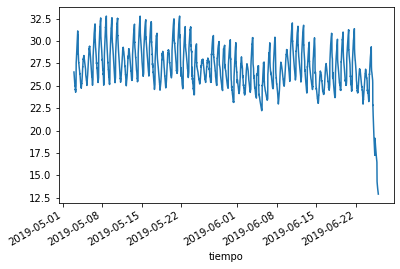

In [87]:
prueba.Tcub.plot()

In [243]:
weekday = prueba[prueba.index.day_of_week<5]
weekend = prueba[prueba.index.day_of_week>=5]

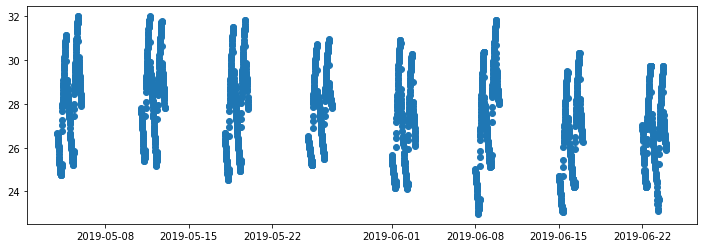

In [43]:
fig, ax = plt.subplots(figsize=(12,4))

ax.scatter(weekend.index,weekend.Tcub)

In [60]:
medidos = pd.read_csv('../../data/weekends.csv',index_col=0,parse_dates=True,names=['tiempo','Ti'],skiprows=1) 
med=medidos.resample('10Min').mean()

In [182]:
compara  = pd.concat([med,weekend.Tcub],axis=1)
compara

AttributeError: 'DataFrame' object has no attribute 'Tcub'

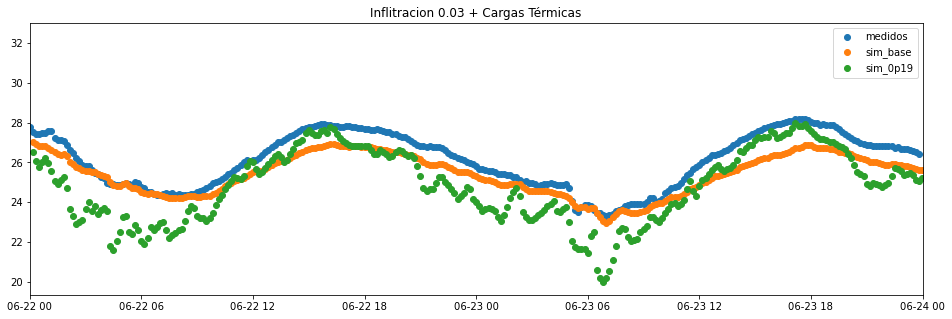

In [206]:
fig, ax = plt.subplots(figsize=(16,5))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara2.index,compara2.Ti,label='medidos')
ax.scatter(compara2.index,compara2.Tcub,label='sim_base')
ax.scatter(compara2.index,compara2.Tcub_0p19,label='sim_0p19')
fin1 = compara[fecha1:fecha2]
plt.title('Inflitracion 0.03 + Cargas Térmicas')
ax.legend()

In [203]:
compara2  = pd.concat([compara,weekend.Tcub_0p19],axis=1)
compara2.to_csv('casos.csv')
compara2

,Ti,Tcub,Tcub_0p19
tiempo,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183
2019-05-04 00:20:00,NaN,26.641856,26.230385
2019-05-04 00:30:00,NaN,26.564087,25.764805
2019-05-04 00:40:00,NaN,26.435694,25.453428
2019-05-04 00:50:00,NaN,26.363116,25.463981
...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN


In [214]:
compara3  = pd.concat([compara2,weekend.Tcub_0p05],axis=1)
compara3.to_csv('casos.csv')
compara3

,Ti,Tcub,Tcub_0p19,Tcub_0p05
tiempo,,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183,26.541559
2019-05-04 00:20:00,NaN,26.641856,26.230385,26.720974
2019-05-04 00:30:00,NaN,26.564087,25.764805,26.484368
2019-05-04 00:40:00,NaN,26.435694,25.453428,26.254809
2019-05-04 00:50:00,NaN,26.363116,25.463981,26.201135
...,...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN,NaN


In [218]:
compara4  = pd.concat([compara3,weekend.Tcub_0p025],axis=1)
compara4.to_csv('casos.csv')
compara4

,Ti,Tcub,Tcub_0p19,Tcub_0p05,Tcub_0p025
tiempo,,,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183,26.541559,26.735255
2019-05-04 00:20:00,NaN,26.641856,26.230385,26.720974,26.911606
2019-05-04 00:30:00,NaN,26.564087,25.764805,26.484368,26.765524
2019-05-04 00:40:00,NaN,26.435694,25.453428,26.254809,26.616794
2019-05-04 00:50:00,NaN,26.363116,25.463981,26.201135,26.560171
...,...,...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN,NaN,NaN


In [226]:
compara5  = pd.concat([compara4,weekend.Tcub_0p04],axis=1)
compara5.to_csv('casos.csv')
compara5

,Ti,Tcub,Tcub_0p19,Tcub_0p05,Tcub_0p025,Tcub_0p04
tiempo,,,,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183,26.541559,26.735255,26.611533
2019-05-04 00:20:00,NaN,26.641856,26.230385,26.720974,26.911606,26.789693
2019-05-04 00:30:00,NaN,26.564087,25.764805,26.484368,26.765524,26.585996
2019-05-04 00:40:00,NaN,26.435694,25.453428,26.254809,26.616794,26.380909
2019-05-04 00:50:00,NaN,26.363116,25.463981,26.201135,26.560171,26.322919
...,...,...,...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN,NaN,NaN,NaN


In [237]:
compara6  = pd.concat([compara5,weekend.Tcub_0p035],axis=1)
compara6.to_csv('casos.csv')
compara6

,Ti,Tcub,Tcub_0p19,Tcub_0p05,Tcub_0p025,Tcub_0p04,Tcub_0p035
tiempo,,,,,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183,26.541559,26.735255,26.611533,26.649971
2019-05-04 00:20:00,NaN,26.641856,26.230385,26.720974,26.911606,26.789693,26.828532
2019-05-04 00:30:00,NaN,26.564087,25.764805,26.484368,26.765524,26.585996,26.642080
2019-05-04 00:40:00,NaN,26.435694,25.453428,26.254809,26.616794,26.380909,26.451803
2019-05-04 00:50:00,NaN,26.363116,25.463981,26.201135,26.560171,26.322919,26.392750
...,...,...,...,...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
compara7  = pd.concat([compara6,weekend.Tcub_0p0375],axis=1)
compara7.to_csv('casos.csv')
compara7

,Ti,Tcub,Tcub_0p19,Tcub_0p05,Tcub_0p025,Tcub_0p04,Tcub_0p035,Tcub_0p0375
tiempo,,,,,,,,
2019-05-04 00:10:00,NaN,26.676896,26.028183,26.541559,26.735255,26.611533,26.649971,26.630430
2019-05-04 00:20:00,NaN,26.641856,26.230385,26.720974,26.911606,26.789693,26.828532,26.808628
2019-05-04 00:30:00,NaN,26.564087,25.764805,26.484368,26.765524,26.585996,26.642080,26.613524
2019-05-04 00:40:00,NaN,26.435694,25.453428,26.254809,26.616794,26.380909,26.451803,26.415621
2019-05-04 00:50:00,NaN,26.363116,25.463981,26.201135,26.560171,26.322919,26.392750,26.356982
...,...,...,...,...,...,...,...,...
2019-07-28 23:10:00,25.323944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:20:00,25.031904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-28 23:30:00,25.030212,NaN,NaN,NaN,NaN,NaN,NaN,NaN


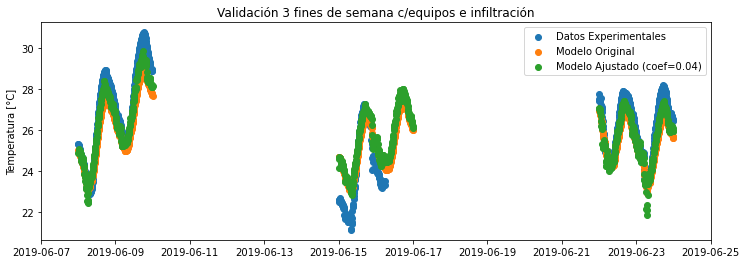

In [263]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-7')
fecha2 = fecha1 + pd.Timedelta('18D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara7.index,compara7.Ti,label='Datos Experimentales')
ax.scatter(compara7.index,compara7.Tcub,label='Modelo Original')
ax.scatter(compara7.index,compara7.Tcub_0p04,label='Modelo Ajustado (coef=0.04)')
fin1 = compara[fecha1:fecha2]
plt.title('Validación 3 fines de semana c/equipos e infiltración')
plt.ylabel('Temperatura [°C]')
ax.legend()

plt.savefig('validacion.png')

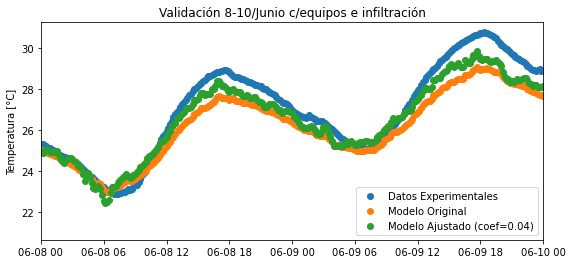

In [264]:
fig, ax = plt.subplots(figsize=(9,4))

fecha1 = parse('2019-06-8')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara7.index,compara7.Ti,label='Datos Experimentales')
ax.scatter(compara7.index,compara7.Tcub,label='Modelo Original')
ax.scatter(compara7.index,compara7.Tcub_0p04,label='Modelo Ajustado (coef=0.04)')
fin1 = compara[fecha1:fecha2]
plt.title('Validación 8-10/Junio c/equipos e infiltración')
plt.ylabel('Temperatura [°C]')
ax.legend()

plt.savefig('zoom806.png')

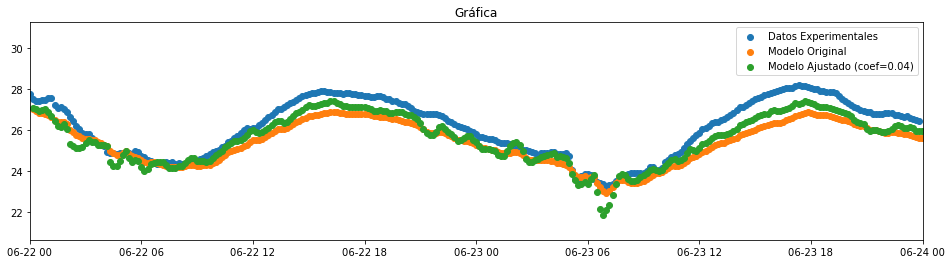

In [254]:
fig, ax = plt.subplots(figsize=(16,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')
ax.set_xlim(fecha1,fecha2)
ax.scatter(compara7.index,compara7.Ti,label='Datos Experimentales')
ax.scatter(compara7.index,compara7.Tcub,label='Modelo Original')
ax.scatter(compara7.index,compara7.Tcub_0p04,label='Modelo Ajustado (coef=0.04)')
fin1 = compara[fecha1:fecha2]
plt.title('Gráfica')
ax.legend()